In [1]:
import os
import glob
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
train_path = "../input/stage1_train/"
file_paths = glob.glob(train_path + "*/images/*.png")

In [3]:
# https://www.kaggle.com/nhargan/defining-microscopy-type
# 0 - staining;
# 1 - fluorescent microscopy;
# 2 - brightfield microscopy;
type_names = {0: "staining", 1: "fluorescent", 2: "brightfield"}

In [4]:
def get_violet_num(img):
    violet_num = 0
    h, w = img.shape[:2]
    for y in range(h):
        for x in range(w):
            if img[y, x][0] > img[y, x][1] and img[y, x][2] > img[y, x][1]:
                violet_num += 1

    return violet_num

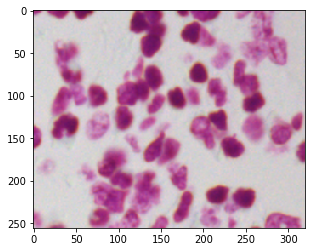

In [5]:
# staining example
img_id = '00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e'
img_path = os.path.join(train_path, img_id, "images", img_id + ".png")
stain_img = cv2.imread(img_path)
plt.imshow(stain_img)
plt.show()

In [6]:
mean_int = stain_img.mean()
print(mean_int)

174.8509033203125


In [7]:
print(get_violet_num(stain_img))


60708


In [8]:
print(stain_img[0,0])


[165  62 130]


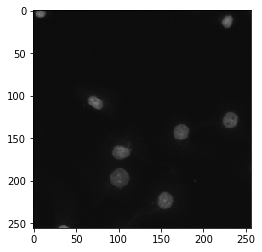

In [9]:
# fluorescent example
img_id = '0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe'
img_path = os.path.join(train_path, img_id, "images", img_id + ".png")
fluo_img = cv2.imread(img_path)
plt.imshow(fluo_img)
plt.show()

In [10]:
mean_int = fluo_img.mean()
print(mean_int)

15.459991455078125


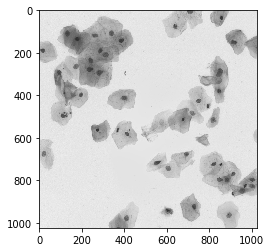

In [11]:
# brightfield example
img_id = '54793624413c7d0e048173f7aeee85de3277f7e8d47c82e0a854fe43e879cd12'
img_path = os.path.join(train_path, img_id, "images", img_id + ".png")
bright_img = cv2.imread(img_path)
plt.imshow(bright_img)
plt.show()

In [12]:
mean_int = bright_img.mean()
print(mean_int)

210.08892250061035


In [13]:
print(get_violet_num(fluo_img))


0


In [14]:
def get_microscopy_type(img):
    violet_num = get_violet_num(img)
    if violet_num > 0:
        return 0
    mean_int = img.mean()
    # randomly picked threshold for distinquishing fluorescent and brightfield
    if mean_int > 100:
        return 2
    return 1

In [15]:
clusters_path = "../input/clusters"
if not os.path.isdir(clusters_path):
    os.mkdir(clusters_path)

for type_name in type_names.values():
    if not os.path.isdir(os.path.join(clusters_path, type_name)):
        os.mkdir(os.path.join(clusters_path, type_name))

In [16]:
types_list = []
for file_path in file_paths:
    img = cv2.imread(file_path)
    img_type = type_names[get_microscopy_type(img)]
    types_list.append(get_microscopy_type(img))
    #uncomment for copy to separate folder 
    shutil.copy(file_path, os.path.join(clusters_path, img_type))

403
fluorescent


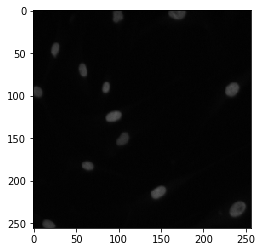

In [17]:
# sanity check
rand_idx = np.random.randint(len(types_list))
print(rand_idx)
print(type_names[types_list[rand_idx]])
img = cv2.imread(file_paths[rand_idx])
plt.imshow(img)
plt.show()